# Final Notebook

## Introduction

##### For this project, we were required to find some metric that would determine the best neighborhood in Pittsburgh. Our approach to finding our metric was to orignially come up with ideas and then find datasets that applied. Our first idea was "best neighborhood to have a glow-up" or "best neighborhood to be an athlete" However, this proposed to be a challenge because the datasets are limited in what they cover. We struggled to find datasets that were applicable to these metrics. While looking through the datasets, we did notice that there is a lot of data on traffic and roadways in Pittsburgh neighborhoods. For this reason, we knew we wanted to do something with this information, but also for our metric to be intersting. That is how we decided on our metric "best neighborhood to film Cars 4". 

## Metric

##### As mentioned above, our metric is "best neighborhood to film Cars 4". The sub-metrics we are measuring include number of speed bumps, number of traffic lights, and number of bridges per neighborhood. In our ideal filming location of Cars 4, there should be the least number of speed bumps and traffic lights, but more bridges. For these reasons, we are reviewing datasets that cover speed bumps, traffic lights, and city bridges.

## Dataset #1 Speed Bumps - Nora

##### When driving, speed bumps require drivers to slow down. However, in the Cars movies, Lightning McQueen is a "Faster than fast and quicker than quick". He has no time to slow down for speed bumps. For this reason, the best neighborhood should have the least number of speed bumps. 

In [132]:
import pandas as pd
import geopandas
%matplotlib inline

In [133]:
#import humps dataset
humps = pd.read_csv("humps.csv")

#make into concise data frame
humps_counts = humps['neighborhood'].value_counts().to_frame().reset_index()
humps_counts.rename(columns = {'index':'neighborhood', 'neighborhood':'# of speed humps'}, inplace = True)
humps_counts

,neighborhood,# of speed humps
0,Squirrel Hill South,18
1,Carrick,9
2,Polish Hill,6
3,North Oakland,6
4,Upper Hill,4
5,Brookline,4
6,Homewood South,4
7,South Side Slopes,4
8,Perry North,4
9,Garfield,3


##### This list above ranks the neighborhoods from most number of speed bumps to least number of speed bumps. Although this information is helpful, it is important to consider the square area of each neighborhood. For example, Squirrel Hill South could have the most speed bumps, but it could also be the largest neighborhood. We want Lightning McQueen to be able to drive the farthest distance without having to slow down for speed bumps. So, it is important to take into account the size of each neighborhood.

In [134]:
#import neighborhood dataset to find square area
hood_one = pd.read_csv("hood.csv")

In [158]:
#re-establish data
humps_counts = humps['neighborhood'].value_counts().to_frame().reset_index()
humps_counts.rename(columns = {'index':'neighborhood', 'neighborhood':'# of speed humps'}, inplace = True)
humps_counts

#merge the counts with area of neighborhood and remove unnecessary columns
humps_counts = humps_counts.merge(hood_one, how='inner', left_on='neighborhood', right_on='hood')
humps_counts = humps_counts.loc[:, ['neighborhood','# of speed humps','sqmiles',]]

#combine columns
def calc_per_area(row):
    return (row['# of speed humps']/row['sqmiles'])

#apply the custom function to create a new column 'humps per area'
humps_counts['humps per area'] = humps_counts.apply(calc_per_area, axis=1)
humps_counts

#descending order
humps_counts = humps_counts.sort_values(by="humps per area", ascending=True)
humps_counts

,neighborhood,# of speed humps,sqmiles,humps per area
17,Overbrook,1,0.836497,1.195461
16,Stanton Heights,1,0.738189,1.354667
14,Highland Park,2,1.169860,1.709606
5,Brookline,4,2.088930,1.914856
10,Squirrel Hill North,3,1.223409,2.452165
12,Mount Washington,3,1.132531,2.648935
11,South Side Flats,3,0.924317,3.245641
8,Perry North,4,1.209913,3.306023
15,Central Oakland,1,0.280047,3.570835
13,Bloomfield,3,0.701931,4.273927


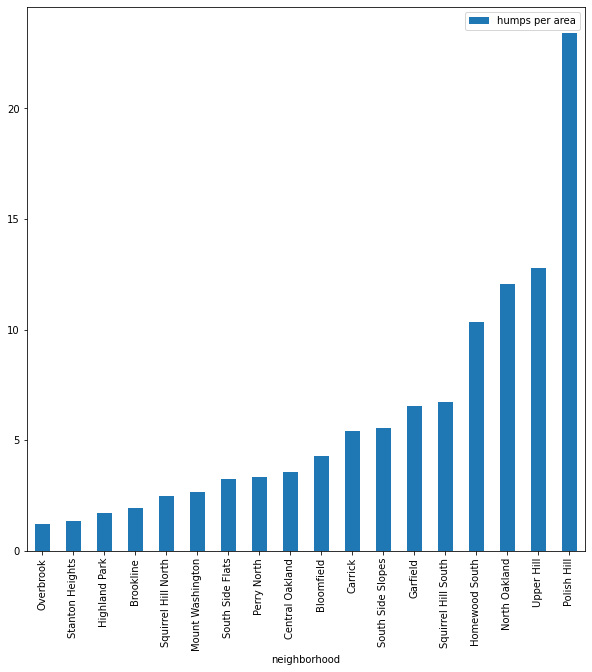

In [156]:
#plot the results
humps_counts.plot(kind='bar', x='neighborhood', y='humps per area', rot=90, figsize=(10, 10))

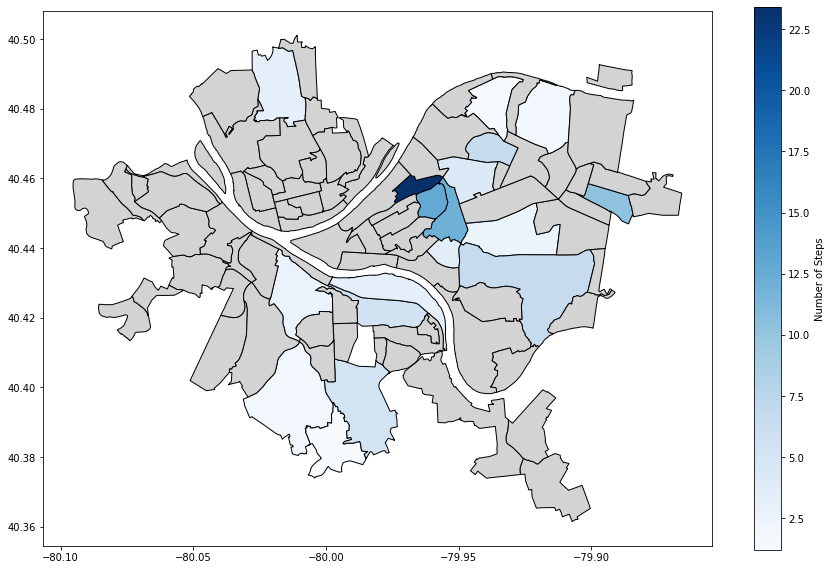

In [137]:
#plot using geopandas
neighborhoods = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/neighborhoods.zip") # read in the shapefile
test = neighborhoods.merge(humps_counts, how='outer', left_on='hood', right_on='neighborhood')
test.plot(column='humps per area', # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Dataset #1 Conclusion
##### As you can see, after dividing each neighborhood's total number of speed bumbs by its square area, Overbrook reveals to be the least speed bump dense neighborhood. Thus, Overbrook is considered to be the best option to film Cars 4 based on a lack of speed bumps, allowing the charactes to speed.

## Dataset #2 Traffic Lights - Layla

##### We all know how frustrating it is when a race has to stop due to traffic lights. Therefore, the ideal neighborhood for racing would be the one with the least number of traffic lights. Choosing a neighborhood with fewer traffic lights not only ensures uninterrupted racing sequences but also allows for a seamless flow, enabling drivers to showcase their skills to the fullest. This will captivate the audience and immerse them in the thrill of the race from start to finish.

In [138]:
import geopandas

In [139]:
#import Traffic Lights dataset
TrafficLights = pd.read_csv('TrafficLights.csv')
counts = TrafficLights['neighborhood'].value_counts()

counts.to_frame()
counts= counts.reset_index()
counts

,index,neighborhood
0,South Side Flats,3672
1,Bloomfield,3627
2,Central Business District,3491
3,Shadyside,3370
4,Squirrel Hill South,3281
...,...,...
86,Ridgemont,62
87,Chartiers City,44
88,Glen Hazel,38
89,Arlington Heights,21


In [140]:
hood = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/neighborhoods.zip")
# do the merge
trafficlights_map = hood.merge(counts, how='left', left_on='hood', right_on='index')

In [141]:
# Importing square area to calculate proportion
trafficlights_map['proportion']= trafficlights_map['neighborhood']/ trafficlights_map['sqmiles']
trafficlights_map

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,index,neighborhood,proportion
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.417067e+06,14181.728584,"POLYGON ((-79.90531 40.45549, -79.90488 40.455...",Point Breeze North,608,2013.773882
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.410837e+07,30326.819418,"POLYGON ((-79.92063 40.44423, -79.92052 40.443...",Squirrel Hill North,1895,1548.950932
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275115e+07,14577.426328,"POLYGON ((-79.93546 40.47257, -79.93530 40.472...",Garfield,848,1854.019693
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.897519e+06,13941.514356,"POLYGON ((-79.96601 40.45520, -79.96595 40.454...",Bedford Dwellings,129,734.313443
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.353046e+06,12021.860516,"POLYGON ((-79.98819 40.41852, -79.98824 40.418...",Knoxville,750,2503.131835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,215,42,003,141000,1,420031410001,Block Group 1,G5030,S,...,2020-08-14,None,5362860.0,93ce438e-e3ec-410d-a7fd-619646e25dc3,5.470266e+06,15761.679800,"POLYGON ((-79.89711 40.42762, -79.89663 40.427...",Regent Square,308,1569.676300
86,87,211,42,003,051100,1,420030511001,Block Group 1,G5030,S,...,2020-08-14,None,9529806.0,2858633a-175e-459b-a4c9-9aac92bfe033,9.050536e+06,17830.507786,"POLYGON ((-79.95848 40.44846, -79.95872 40.448...",Terrace Village,306,942.571868
87,88,153,42,003,562600,2,420035626002,Block Group 2,G5030,S,...,2020-08-14,None,16904768.0,fbc3ab11-0429-476e-80fd-700f969b204a,1.689127e+07,21714.648283,"POLYGON ((-80.03619 40.45073, -80.03496 40.449...",Elliott,547,902.803573
88,89,16,42,003,170200,1,420031702001,Block Group 1,G5030,S,...,2020-08-14,None,26083320.0,39308990-70d5-4da6-b2a0-a5510f18e9b9,2.576841e+07,34700.371969,"POLYGON ((-79.97726 40.43274, -79.97725 40.432...",South Side Flats,3672,3972.664348


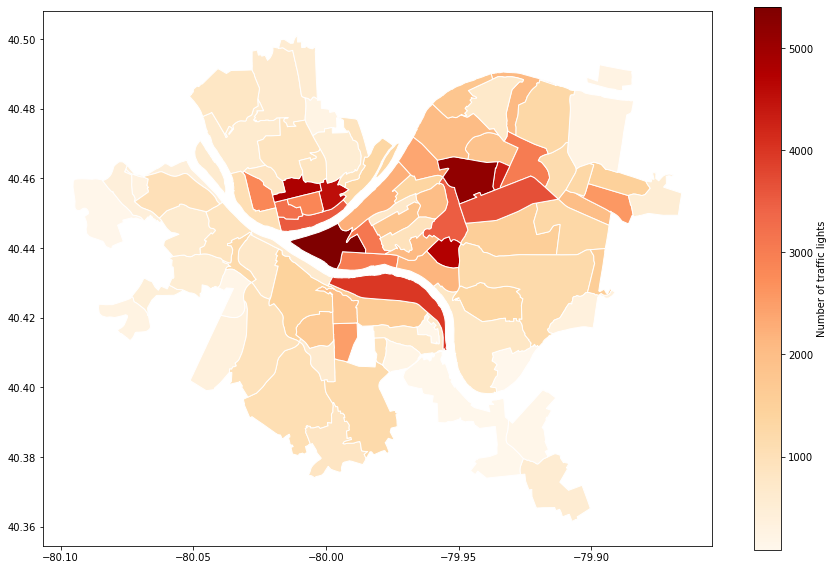

In [142]:
# Plotting a map
trafficlights_map.plot(column='proportion', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of traffic lights"}, # label the legend
               figsize=(15, 10)         # set the size
               )

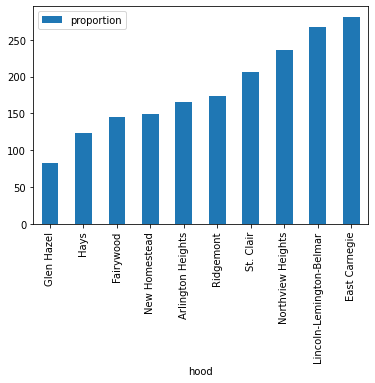

In [143]:
# Plotting a bar chart
trafficlights_map= trafficlights_map[['hood', 'proportion']]

# neighborhoods with lowest proportions
trafficlights_map = trafficlights_map.sort_values(by='proportion',ascending=True)
trafficlights_map.head(10).plot(kind='bar', x='hood')

## Dataset #2 Conclusion


##### According to our calculations, the neighborhood with the fewest traffic lights relative to its area is "**Glen Hazel**". Therefore, it would be the best neghborhood to film Cars 4 based on traffic lights proportions.

## Dataset #3 Scenic Route (Bridges) - Nora

##### Cinematography is crucial for making or breaking a movie. For this reason, it is very important that the filming location of Cars 4 is scenic and offers great filming locations. The most scenic and car accessible feature of Pittsburgh is its many bridges. The next dataset records the number of bridges in each neighborhood in Pittsburgh. The neighborhood with the most bridges will be the best for filming Cars 4.

In [144]:
bridge = pd.read_csv("bridge.csv")
bridge_counts = bridge['neighborhood'].value_counts().to_frame().reset_index()
bridge_counts.rename(columns = {'index':'neighborhood', 'neighborhood':'# of bridges'}, inplace = True)
bridge_counts

,neighborhood,# of bridges
0,Squirrel Hill South,14
1,Central Business District,12
2,Troy Hill,7
3,Overbrook,6
4,Hays,6
5,Shadyside,6
6,Oakwood,5
7,South Side Slopes,5
8,South Side Flats,5
9,West End,4


##### Again, this list above ranks the neighborhoods from most number of bridges to least number of bridges. It is important to consider the square area of each neighborhood. For example, Squirrel Hill South could have the most bridges, but it could also be the largest neighborhood. We want Lightning McQueen to be able to drive the least distance in order to get from one bridge to the next. So, it is important to take into account the size of each neighborhood.

In [145]:
#import neighborhood dataset to find square area
hood_two = pd.read_csv("hood.csv")

In [157]:
#re-establish data
bridge_counts = bridge['neighborhood'].value_counts().to_frame().reset_index()
bridge_counts.rename(columns = {'index':'neighborhood', 'neighborhood':'# of bridges'}, inplace = True)
bridge_counts

#merge the counts with area of neighborhood and remove unnecessary columns
bridge_counts = bridge_counts.merge(hood_two, how='inner', left_on='neighborhood', right_on='hood')
bridge_counts = bridge_counts.loc[:, ['neighborhood','# of bridges','sqmiles',]]

#combine columns
def calc_per_area(row):
    return (row['# of bridges']/row['sqmiles'])

#apply the custom function to create a new column 'bridges per area'
bridge_counts['bridges per area'] = bridge_counts.apply(calc_per_area, axis=1)
bridge_counts

#descending order
bridge_counts = bridge_counts.sort_values(by="bridges per area", ascending=False)
bridge_counts.head(20)

,neighborhood,# of bridges,sqmiles,bridges per area
9,West End,4,0.194566,20.558597
6,Oakwood,5,0.252383,19.811177
1,Central Business District,12,0.645632,18.586440
12,East Allegheny,4,0.234916,17.027396
2,Troy Hill,7,0.460914,15.187209
16,Allegheny Center,3,0.208937,14.358407
28,Allegheny West,2,0.144794,13.812698
18,Polish Hill,3,0.256164,11.711237
14,Bon Air,3,0.314830,9.528939
10,South Oakland,4,0.483958,8.265173


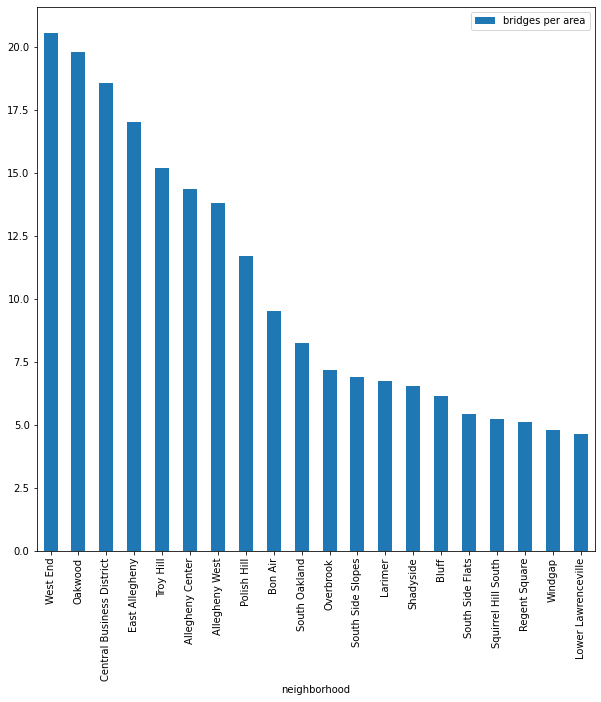

In [147]:
#represent data frame as a bar plot
bridge_counts.head(20).plot(kind='bar',  x='neighborhood', y='bridges per area', rot=90, figsize=(10, 10))

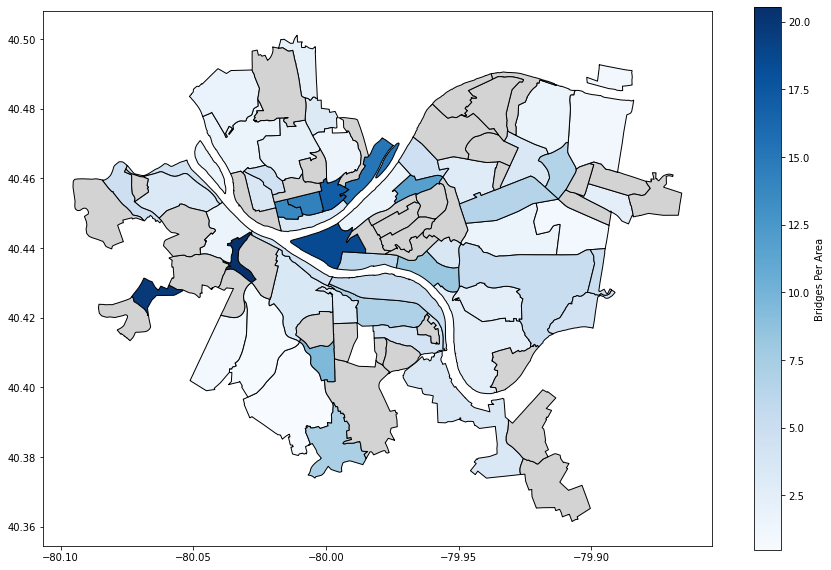

In [148]:
#plot using geopandas
neighborhoods = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/neighborhoods.zip") # read in the shapefile
test_three = neighborhoods.merge(bridge_counts, how='outer', left_on='hood', right_on='neighborhood')
test_three.plot(column='bridges per area', # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Bridges Per Area"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Dataset #3 Conclusion
##### As you can see, after dividing each neighborhood's total number of brides by its square area, West End reveals to be the most bridge bump dense neighborhood. Thus, West End is considered to be the best option to film Cars 4 based on the most bridges (scenic routes).

## Combining All Sub-Metrics

##### In order to determine the best overall neighborhood to film Cars 4, we have to combine all sub-metrics. In order to do this, we decided to calculate the total number of speed bumps, traffic lights, and bridges per neighborhood and calculate the total per square area. However, because we want to calcuate the least number of speed bumps and traffic lights, we will consider their counts to be negative. So, essentially, we are subtracting the number of speed bumps and traffic lights away from the total number of bridges per neighborhood. Then we will calcualate this area per square area. 

In [149]:
#re-establish data frames
humps_counts = humps['neighborhood'].value_counts().to_frame().reset_index()
counts = TrafficLights['neighborhood'].value_counts().to_frame().reset_index()
bridge_counts = bridge['neighborhood'].value_counts().to_frame().reset_index()
hood = pd.read_csv("hood.csv")

# do the merge
total = humps_counts.merge(counts, how='outer', left_on='index', right_on='index')
total = total.merge(bridge_counts, how='outer', left_on='index', right_on='index')
total = total.merge(hood, how='outer', left_on='index', right_on='hood')

#rename and drop columns 
total.rename(columns = {'index':'neighborhood', 'neighborhood_x':'# of speed humps', 'neighborhood_y':'# of traffic lights', 'neighborhood':'# of bridges'}, inplace = True)
total = total.loc[:, ['neighborhood','# of speed humps','# of traffic lights','# of bridges','sqmiles']]
total.head()

#fill NaN/drop NaN
total['# of speed humps'] = total['# of speed humps'].fillna(0)
total['# of traffic lights'] = total['# of traffic lights'].fillna(0)
total['# of bridges'] = total['# of bridges'].fillna(0)
total = total.dropna(subset=["sqmiles"])
total

,neighborhood,# of speed humps,# of traffic lights,# of bridges,sqmiles
0,Squirrel Hill South,18.0,3281,14.0,2.676605
1,Carrick,9.0,2044,0.0,1.669530
2,Polish Hill,6.0,349,3.0,0.256164
3,North Oakland,6.0,1743,0.0,0.497002
4,Upper Hill,4.0,631,0.0,0.313189
...,...,...,...,...,...
85,St. Clair,0.0,64,0.0,0.311056
86,Ridgemont,0.0,62,0.0,0.357649
87,Chartiers City,0.0,44,0.0,0.134015
88,Glen Hazel,0.0,38,0.0,0.457463


In [150]:
#combine columns
def combine_columns(row):
    return (row['# of speed humps'] - row['# of traffic lights'] + row['# of bridges'])

# Apply the custom function to create a new column 'Combined'
total['count'] = total.apply(combine_columns, axis=1)
total

,neighborhood,# of speed humps,# of traffic lights,# of bridges,sqmiles,count
0,Squirrel Hill South,18.0,3281,14.0,2.676605,-3249.0
1,Carrick,9.0,2044,0.0,1.669530,-2035.0
2,Polish Hill,6.0,349,3.0,0.256164,-340.0
3,North Oakland,6.0,1743,0.0,0.497002,-1737.0
4,Upper Hill,4.0,631,0.0,0.313189,-627.0
...,...,...,...,...,...,...
85,St. Clair,0.0,64,0.0,0.311056,-64.0
86,Ridgemont,0.0,62,0.0,0.357649,-62.0
87,Chartiers City,0.0,44,0.0,0.134015,-44.0
88,Glen Hazel,0.0,38,0.0,0.457463,-38.0


In [151]:
#calculate per square mile
total['count per area']= total['count']/ hood_two['sqmiles']

#descending order
total = total.sort_values(by="count per area", ascending=False)
total.head()

,neighborhood,# of speed humps,# of traffic lights,# of bridges,sqmiles,count,count per area
88,Glen Hazel,0.0,38,0.0,0.457463,-38.0,-41.111450
80,Oakwood,0.0,118,5.0,0.252383,-113.0,-42.217655
87,Chartiers City,0.0,44,0.0,0.134015,-44.0,-72.620397
89,Arlington Heights,0.0,21,0.0,0.127234,-21.0,-84.510671
83,Esplen,0.0,98,1.0,0.231118,-97.0,-107.023128


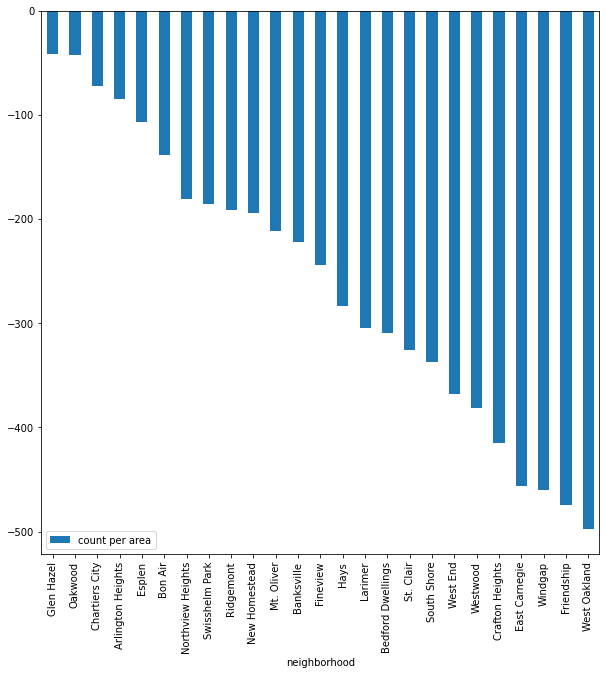

In [152]:
#plot the first 25 rows since in descending order
total.head(25).plot(kind='bar', x='neighborhood', y='count per area',rot=90, figsize=(10, 10))

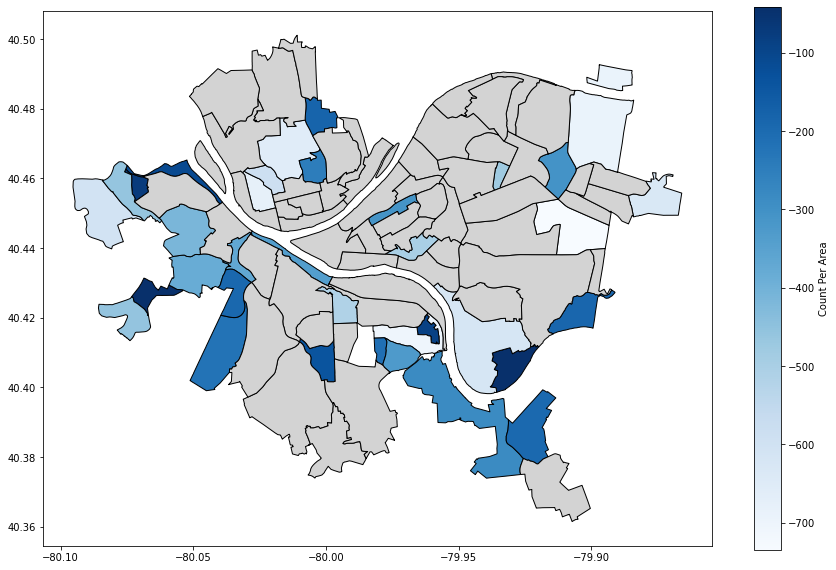

In [153]:
#plot using geopandas
neighborhoods = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/neighborhoods.zip") # read in the shapefile
test_final = neighborhoods.merge(total.head(35), how='outer', left_on='hood', right_on='neighborhood')
test_final.plot(column='count per area', # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Count Per Area"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Data Conclusion - Glen Hazel
##### According to the data, the neighborhood that is best for the filming of Cars 4 is Glen Hazel because it has the largest count per square area. This was calculated according to least number of speed bumps, traffic lights, and most bridges.

## Conclusion - Nora

##### In conclusion, Glen Hazel is not my favorite neighborhood in Pittsburgh. My favorite neighborhoods are Shadyside and the Strip District because of their shops and areas for running. With that being said, these neighborhoods did not fair well in the data. Strip District had a score of -1400 counts per area and Shadyside has a score of -7000 counts per area compared to Glen Hazel with a score of -41 counts per area. Overall, the data shows that Glen Hazel is the best location for filming Cars 4.

## Conclusion - Layla

write conclusion here.